# Kickstarter Projects
## Notebook 02

Group's members:
- Crnigoj Gabriele 134176
- Ferraro Tommaso 132998
- Stinat Kevin 134905

# Data Loading

We load and dump the file with `joblib` insted of "pickle" because we want to load and dump the data in the right way in order to avoid the possibilities of errors during the reading step.

Analyzing the dataframe , as we expected, the columns 'ID', 'goal', 'pledged', 'backers', 'usd_pledged_real' and 'usd pledged' have numerical nature. Using the `.describe()` function we get some more information about the data. However some of them are  meaningful.

In [1]:
import numpy as np
import pandas as pd
import joblib
import pickle
import os
from tqdm import tqdm

In [2]:
os.path.exists('Kickstarter_Dataframe')

True

In [3]:
from tempfile import mkdtemp
savedir = 'Kickstarter_Dataframe'
filename = os.path.join(savedir, 'Kikstarter_Backup_File') 

with open(filename,'rb') as r:
    df_ks = joblib.load(r)
    
df_ks.head(2)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,...,usd pledged,usd_pledged_real,usd_goal_real,Launch_Year,Launch_Month,Launch_Day,Deadline_Year,MDeadline_Month,Deadline_Day,crowdfounding_period
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,...,0.0,0.0,1533.95,2015,8,11,2015,10,9,58
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,...,100.0,2421.0,30000.00,2017,9,2,2017,11,1,59


In [4]:
df_ks.shape

(378661, 22)

In [5]:
df_ks.dtypes

ID                        int64
name                     object
category                 object
main_category            object
currency                 object
deadline                 object
goal                    float64
launched                 object
pledged                 float64
state                    object
backers                   int64
country                  object
usd pledged             float64
usd_pledged_real        float64
usd_goal_real           float64
Launch_Year              object
Launch_Month             object
Launch_Day               object
Deadline_Year            object
MDeadline_Month          object
Deadline_Day             object
crowdfounding_period     object
dtype: object

# Managing and Data Cleaning : NaN and Null Values

In order to be able to use and work with those data, we decided to use the `fillna` function that allow us to insert the **unknown** value instead of the **null** values.

To check the number of Null values we used the funcion `isna()` & `isnull()` and we put those values inside a dataframe called **df_ks_NaN** which is made by 3801 line which are exactly the sum of the null values found with the function above.

For each element of this dataframe that has some missing value we fill them with "Unknown". And to be sure of the right execution we check if the sum of the missing values runnung again the `.isnull().sum()` functions.

In [6]:
df_ks.isnull().sum()

ID                         0
name                       4
category                   0
main_category              0
currency                   0
deadline                   0
goal                       0
launched                   0
pledged                    0
state                      0
backers                    0
country                    0
usd pledged             3797
usd_pledged_real           0
usd_goal_real              0
Launch_Year                0
Launch_Month               0
Launch_Day                 0
Deadline_Year              0
MDeadline_Month            0
Deadline_Day               0
crowdfounding_period       0
dtype: int64

In [7]:
df_ks.isna().sum()

ID                         0
name                       4
category                   0
main_category              0
currency                   0
deadline                   0
goal                       0
launched                   0
pledged                    0
state                      0
backers                    0
country                    0
usd pledged             3797
usd_pledged_real           0
usd_goal_real              0
Launch_Year                0
Launch_Month               0
Launch_Day                 0
Deadline_Year              0
MDeadline_Month            0
Deadline_Day               0
crowdfounding_period       0
dtype: int64

In [8]:
df_ks_NaN = df_ks[df_ks.isna().any(axis=1)]
df_ks_NaN.head(2)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,...,usd pledged,usd_pledged_real,usd_goal_real,Launch_Year,Launch_Month,Launch_Day,Deadline_Year,MDeadline_Month,Deadline_Day,crowdfounding_period
169,1000694855,STREETFIGHTERZ WHEELIE MURICA,Film & Video,Film & Video,USD,2014-09-20,6500.0,2014-08-06 21:28:36,555.0,undefined,...,NaN,555.00,6500.00,2014,8,6,2014,9,20,44
328,100149523,Duncan Woods - Chameleon EP,Music,Music,AUD,2015-08-25,4500.0,2015-08-04 12:05:17,4767.0,undefined,...,NaN,3402.08,3211.53,2015,8,4,2015,8,25,20


In [9]:
df_ks_NaN.shape

(3801, 22)

In [10]:
df_kickstarter = df_ks.fillna('Unknow')
df_kickstarter.head(2)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,...,usd pledged,usd_pledged_real,usd_goal_real,Launch_Year,Launch_Month,Launch_Day,Deadline_Year,MDeadline_Month,Deadline_Day,crowdfounding_period
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,...,0,0.0,1533.95,2015,8,11,2015,10,9,58
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,...,100,2421.0,30000.00,2017,9,2,2017,11,1,59


In [11]:
df_kickstarter.isnull().sum()

ID                      0
name                    0
category                0
main_category           0
currency                0
deadline                0
goal                    0
launched                0
pledged                 0
state                   0
backers                 0
country                 0
usd pledged             0
usd_pledged_real        0
usd_goal_real           0
Launch_Year             0
Launch_Month            0
Launch_Day              0
Deadline_Year           0
MDeadline_Month         0
Deadline_Day            0
crowdfounding_period    0
dtype: int64

In [12]:
df_kickstarter.describe()

,ID,goal,pledged,backers,usd_pledged_real,usd_goal_real,Launch_Year,Launch_Month,Launch_Day,Deadline_Year,MDeadline_Month,Deadline_Day,crowdfounding_period
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.786610e+05,3.786610e+05,378661.000000,378661.000000,378661.000000,378661.000000,378661.000000,378661.000000,378661.000000
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,9.058924e+03,4.545440e+04,2014.247829,6.461550,15.294142,2014.320698,6.720726,15.282934,33.481122
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,9.097334e+04,1.152950e+06,1.933293,3.330133,8.808409,1.924450,3.342550,9.036274,65.909172
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,1.000000e-02,1970.000000,1.000000,1.000000,2009.000000,1.000000,1.000000,0.000000
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,3.100000e+01,2.000000e+03,2013.000000,4.000000,8.000000,2013.000000,4.000000,7.000000,29.000000
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,6.243300e+02,5.500000e+03,2014.000000,7.000000,15.000000,2015.000000,7.000000,15.000000,29.000000
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,4.050000e+03,1.550000e+04,2016.000000,9.000000,23.000000,2016.000000,10.000000,23.000000,36.000000
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,1.663614e+08,2018.000000,12.000000,31.000000,2018.000000,12.000000,31.000000,16738.000000


# Managing and Data Cleaning : Unique and Unusual Values

Using the `nunique()` function we have seen how there are 378661 different IDs but only 375765 Name and this means that for some projects the name has been repeated.

In fact to check this type of values we used the `counter` function and, through a for loop, we created a dictionary which contains each name that appeared more than once in our database, with the number of times that it is repeated.

We then created a dataframe called **repetitition** containing all the lines that had the repetition of the name.
Analyzing this dataframe we noticed that there are some projects that have been attempted several times on different dates or with different parameters.

In [13]:
df_kickstarter.drop(columns = ['deadline', 'launched'], inplace = True)
df_kickstarter.nunique()

ID                      378661
name                    375765
category                   159
main_category               15
currency                    14
goal                      8353
pledged                  62130
state                        6
backers                   3963
country                     23
usd pledged              95456
usd_pledged_real        106065
usd_goal_real            50339
Launch_Year                 11
Launch_Month                12
Launch_Day                  31
Deadline_Year               10
MDeadline_Month             12
Deadline_Day                31
crowdfounding_period        99
dtype: int64

In [14]:
df_kickstarter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 20 columns):
ID                      378661 non-null int64
name                    378661 non-null object
category                378661 non-null object
main_category           378661 non-null object
currency                378661 non-null object
goal                    378661 non-null float64
pledged                 378661 non-null float64
state                   378661 non-null object
backers                 378661 non-null int64
country                 378661 non-null object
usd pledged             378661 non-null object
usd_pledged_real        378661 non-null float64
usd_goal_real           378661 non-null float64
Launch_Year             378661 non-null int64
Launch_Month            378661 non-null int64
Launch_Day              378661 non-null int64
Deadline_Year           378661 non-null int64
MDeadline_Month         378661 non-null int64
Deadline_Day            378661 non-null int64


In [15]:
from collections import defaultdict
from collections import Counter

counter = defaultdict(lambda: 0)

counter = Counter(list(df_kickstarter.name))
project_inspection = dict(filter((lambda x: x[1] > 1), counter.items()))

In [16]:
temp = pd.DataFrame()
repetition = pd.DataFrame(columns = df_kickstarter.columns)

for l in tqdm(df_kickstarter.name):
    for k in project_inspection.keys():
        if l == k:
            temp = df_kickstarter.loc[df_kickstarter.name == l]
            repetition = repetition.append(temp)

repetition.head()

100%|██████████| 378661/378661 [16:31<00:00, 381.94it/s]


,ID,name,category,main_category,currency,goal,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,Launch_Year,Launch_Month,Launch_Day,Deadline_Year,MDeadline_Month,Deadline_Day,crowdfounding_period
219,1000940032,Space Trucker,Video Games,Games,USD,150.0,165.0,successful,7,US,25,165.00,150.00,2016,11,8,2016,12,8,29
136862,1694996467,Space Trucker,Video Games,Games,USD,300000.0,5753.0,failed,142,US,5753,5753.00,300000.00,2013,12,12,2014,1,12,30
241,1001052357,Spilt Milk,Graphic Novels,Comics,AUD,18000.0,832.0,failed,23,AU,375.22,623.55,13490.22,2016,12,9,2017,1,8,29
334003,771376120,Spilt Milk,Television,Film & Video,AUD,30000.0,0.0,failed,0,AU,0,0.00,22204.13,2015,6,16,2015,7,16,29
250,1001110351,Kingdoms of Erden: King of the Mountain,Tabletop Games,Games,USD,1000.0,745.0,canceled,52,US,316,745.00,1000.00,2017,6,26,2017,7,27,30


# Data Analysis: Top Compaign

In the following statement we analysed the dataframe and we have calulated some intresting paramenters in order to undestand better the database.   
We find out that the campaign with the highest amount pledged is the "Pebble Time - Awesome Smartwatch, No Compromises".In fact the goal of this campaign was 500000, but eventually 20338986 (Over 20 million!) USD was pledged.

78471 people backed the campaign and the average backer pledged 259.19 USD.

In [17]:
#Analysis
df_ks['discrepancy'] = df_ks['goal'] - df_ks['usd_pledged_real']
df_ks['target_reached'] = df_ks['discrepancy'] <= 0

target_reached = df_ks.loc[lambda df_ks: df_ks['target_reached'] == True]
target_not_reached = df_ks.loc[lambda df_ks: df_ks['target_reached'] == False]

target_reached_perc = round(len(target_reached) / len(df_ks) * 100, 2)
target_not_reached_perc = round(len(target_not_reached) / len(df_ks) * 100, 2)

df_ks['avg_pledged'] = df_ks['usd_pledged_real'] / df_ks['backers']

df_ks['avg_pledged'].fillna(0, inplace=True)
df_ks.replace(to_replace = [np.inf, -np.inf], value = 0, inplace = True)

#Print
print('Out of {} Kickstarter campaigns:\n\n{} % reached their target over time.'.format(len(df_ks), target_reached_perc))

print('For the {} campaigns that reached their target, there was on average {} USD pledged more than the target.\n'.format(len(target_reached), round(target_reached['usd_pledged_real'].mean(), 2)))

print('{} % of the campaigns did not reach their target.\nFor the {} campaigns that did not reach their target, there was on average {} USD pledged less than the target.\n'.format(target_not_reached_perc, len(target_not_reached), round(target_not_reached['usd_pledged_real'].mean(), 2)))

print('Kickstarter backers pledge {} USD to a campaign on average'.format(round(df_ks['avg_pledged'].mean(), 2)))

Out of 378661 Kickstarter campaigns:

34.93 % reached their target over time.
For the 132255 campaigns that reached their target, there was on average 22997.36 USD pledged more than the target.

65.07 % of the campaigns did not reach their target.
For the 246406 campaigns that did not reach their target, there was on average 1577.66 USD pledged less than the target.

Kickstarter backers pledge 64.58 USD to a campaign on average


In [18]:
perc_successful = len(df_ks[df_ks['state'] == 'successful']) / len(df_ks) * 100
perc_failed = len(df_ks[df_ks['state'] == 'failed']) / len(df_ks) * 100
perc_canceled = len(df_ks[df_ks['state'] == 'canceled']) / len(df_ks) * 100
perc_other = 100 - (perc_successful + perc_failed + perc_canceled)

print('{} % of campaigns were successful\n\
{} % of campaigns failed\n\
{} % of campaigns were canceled\n\
{} % of campaigns belong to other categories'.format(round(perc_successful, 2), round(perc_failed, 2), round(perc_canceled, 2), round(perc_other, 2)))

35.38 % of campaigns were successful
52.22 % of campaigns failed
10.24 % of campaigns were canceled
2.17 % of campaigns belong to other categories


In [19]:
# Get a list of all categories in 'main_category'
cat_list = list(df_ks['main_category'].unique())

# Create a mapping of the average pledged per backer for every category
pledge_mapping = dict()
for category in cat_list:
    cat_df = df_ks[df_ks['main_category'] == category]
    pledge_mapping.update({category : cat_df['avg_pledged'].mean()})
    
# Visualize the results
pledge_df = pd.DataFrame(pledge_mapping, index = ['avg_pledged'])
pledge_df.sort_values('avg_pledged', axis = 1, inplace=True, ascending=False)
display(pledge_df.head())

,Technology,Design,Film & Video,Dance,Theater,Fashion,Food,Music,Art,Photography,Games,Publishing,Comics,Journalism,Crafts
avg_pledged,95.985817,94.35646,76.1804,70.725558,70.447174,63.856153,62.741457,55.035269,54.870922,52.693231,50.415755,47.763362,41.061157,38.083108,38.019355


In [20]:
top_campaign = df_ks.loc[df_ks['usd_pledged_real'].idxmax()]
top_name = df_ks.loc[df_ks['usd_pledged_real'].idxmax()]['name']
top_goal = df_ks.loc[df_ks['usd_pledged_real'].idxmax()]['goal']
top_pledged = df_ks.loc[df_ks['usd_pledged_real'].idxmax()]['usd_pledged_real']
top_backers = df_ks.loc[df_ks['usd_pledged_real'].idxmax()]['backers']
top_avg_pledged = df_ks.loc[df_ks['usd_pledged_real'].idxmax()]['avg_pledged']

print('The campaign with the highest amount pledged is the "{}".\n\n\
The goal of this campaign was {}, but eventually {} (Over 20 million!) USD was pledged.\n\n\
{} people backed the campaign and the average backer pledged {} USD.'.format(top_name,int(top_goal),top_pledged, 
                                                                                 top_backers, top_avg_pledged))

The campaign with the highest amount pledged is the "Pebble Time - Awesome Smartwatch, No Compromises".

The goal of this campaign was 500000, but eventually 20338986.27 (Over 20 million!) USD was pledged.

78471 people backed the campaign and the average backer pledged 259.1911186298123 USD.


In [21]:
display(top_campaign)

ID                                                            1799979574
name                    Pebble Time - Awesome Smartwatch, No Compromises
category                                                  Product Design
main_category                                                     Design
currency                                                             USD
deadline                                                      2015-03-28
goal                                                              500000
launched                                             2015-02-24 15:44:42
pledged                                                       2.0339e+07
state                                                         successful
backers                                                            78471
country                                                               US
usd pledged                                                   2.0339e+07
usd_pledged_real                                   

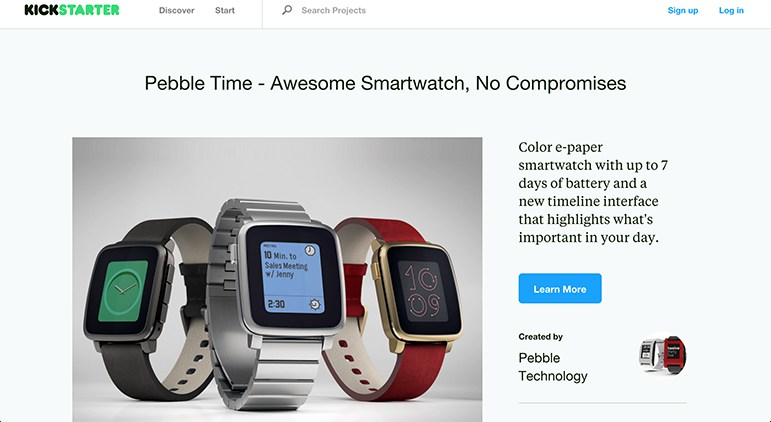

# Gini  Index


In the following statement we have caluleted the Gini index of our categorical attributes. Our goal for this part is to find out if there are some particular pattern in those attributes that have a higher discriminative power. In fact the lower the Gini value, the higher the discriminative power.

But as we can see, the values of the gini index are almost all on 0.5 which means that the 'state' has no particular occurrences in every categorical attributes.

In [22]:
categorical = list(filter(lambda x: x not in ['ID', 'name', 'goal', 'pledged', 'backers', 'usd pledged', 'launched', 'deadline',
                                              'usd_pledged_real', 'usd_goal_real', 'Launch_Year',
                                              'Launch_Month', 'Launch_Day', 'Deadline_Year', 
                                              'MDeadline_Month', 'Deadline_Day', 'crowdfounding_period'], df_kickstarter.columns))
categorical

['category', 'main_category', 'currency', 'state', 'country']

In [23]:
def gini(df, attribute, c_attribute):
    _df = df[[attribute, c_attribute]].dropna()
    _df_agg = (_df.groupby([attribute, c_attribute]).size() / _df.groupby(attribute).size()) ** 2
    _df_agg = _df_agg.reset_index().groupby(attribute).apply(lambda s: 1.0 - sum(s[0]))
    _df_agg.loc['categories_list'] =  (_df_agg * (_df.groupby('state').size() / _df.shape[0])).sum()
    return _df_agg

In [24]:
for index, attribute in enumerate(set(categorical) - set(["state"])):  
        print(gini(df_kickstarter, attribute, "state"))
        print('\n\n')

country
AT                 0.543011
AU                 0.570346
BE                 0.562822
CA                 0.588850
CH                 0.553518
DE                 0.567991
DK                 0.616509
ES                 0.563357
FR                 0.588952
GB                 0.592368
HK                 0.675506
IE                 0.571710
IT                 0.506336
JP                 0.718750
LU                 0.526015
MX                 0.593583
N,0"               0.118388
NL                 0.543143
NO                 0.570510
NZ                 0.567285
SE                 0.577745
SG                 0.632598
US                 0.581051
categories_list    0.000000
dtype: float64



category
3D Printing          0.628263
Academic             0.528303
Accessories          0.595749
Action               0.474828
Animals              0.509681
Animation            0.550386
Anthologies          0.480119
Apparel              0.506539
Apps                 0.375185
Architecture         0.

In [25]:
df_kickstarter.dtypes

ID                        int64
name                     object
category                 object
main_category            object
currency                 object
goal                    float64
pledged                 float64
state                    object
backers                   int64
country                  object
usd pledged              object
usd_pledged_real        float64
usd_goal_real           float64
Launch_Year               int64
Launch_Month              int64
Launch_Day                int64
Deadline_Year             int64
MDeadline_Month           int64
Deadline_Day              int64
crowdfounding_period      int64
dtype: object

In [26]:
df_kickstarter.astype({'ID': 'float64', 'backers': 'float64', 'Launch_Year': 'float64', 'Launch_Month': 'float64', 
                       'Launch_Day': 'float64', 'Deadline_Year': 'float64', 'MDeadline_Month': 'float64',
                       'Deadline_Day': 'float64' ,'crowdfounding_period': 'float64'}).dtypes

ID                      float64
name                     object
category                 object
main_category            object
currency                 object
goal                    float64
pledged                 float64
state                    object
backers                 float64
country                  object
usd pledged              object
usd_pledged_real        float64
usd_goal_real           float64
Launch_Year             float64
Launch_Month            float64
Launch_Day              float64
Deadline_Year           float64
MDeadline_Month         float64
Deadline_Day            float64
crowdfounding_period    float64
dtype: object

# Data Analysis

In this phase we plotted the most significant data so we can best represent our dataframe in the best way possible.
Clearly the best way to analyze our data was to divide the projects according to their state; successful failed & others (canceled, live, undifined, suspended).

We also analyzed our data by dividing them by category to identify any recurrency in the outcome of the kickstarting project.

Futhermore we have plotted the distinctions for the pledged & backers sorted by categories.

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [28]:
success_projects = df_kickstarter[df_kickstarter['state'] == 'successful']['state'].count()
fail_projects  = df_kickstarter[df_kickstarter['state'] == 'failed']['state'].count()
others_projects  = (
    df_kickstarter[df_kickstarter['state'] == 'canceled']['state'].count() +
    df_kickstarter[df_kickstarter['state'] == 'live']['state'].count() +
    df_kickstarter[df_kickstarter['state'] == 'undefined']['state'].count() +
    df_kickstarter[df_kickstarter['state'] == 'suspended']['state'].count())

In [29]:
total=success_projects+fail_projects+others_projects
suc=success_projects/total
fail=fail_projects/total
other=others_projects/total

Text(0.5, 1.0, 'Total Success Rate')

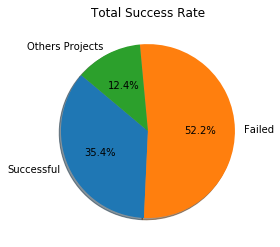

In [30]:
sizes = [suc, fail, other]
labels = 'Successful', 'Failed', 'Others Projects'
plt.pie(sizes, labels = labels, autopct = '%1.1f%%', shadow=True, startangle = 140)
plt.title("Total Success Rate")

In [31]:
failed = df_kickstarter.loc[df_kickstarter.state=='failed']
successful = df_kickstarter.loc[df_kickstarter.state=='successful']
canceled = df_kickstarter.loc[df_kickstarter.state=='canceled']
print('Mean duration of failed campaigns',failed['crowdfounding_period'].mean())
print('Mean duration of successful campaigns',successful['crowdfounding_period'].mean())
print('Mean duration of canceled campaigns',canceled['crowdfounding_period'].mean())

Mean duration of failed campaigns 34.17335208047785
Mean duration of successful campaigns 31.156469288423065
Mean duration of canceled campaigns 37.26911472704299


In [32]:
groupby_main_category = successful.groupby(['main_category']).mean()
groupby_main_category

,ID,goal,pledged,backers,usd_pledged_real,usd_goal_real,Launch_Year,Launch_Month,Launch_Day,Deadline_Year,MDeadline_Month,Deadline_Day,crowdfounding_period
main_category,,,,,,,,,,,,,
Art,1.079846e+09,4642.114081,7836.474882,90.358123,6971.894850,4410.086374,2013.898002,6.265248,15.229453,2013.945439,6.700521,15.017550,29.340139
Comics,1.059403e+09,5693.607838,11902.964118,231.404314,11385.660235,5397.352176,2014.642759,6.304861,14.755050,2014.677679,6.929305,14.935125,30.908593
Crafts,1.077424e+09,3539.475650,7022.015139,94.148463,5629.696889,3013.430794,2014.863357,6.426950,15.217494,2014.903073,6.907329,15.119149,28.026950
Dance,1.079357e+09,4941.846497,5550.954380,63.396065,5194.016121,4601.094769,2013.555603,6.280582,14.951668,2013.619333,6.565441,14.854577,30.814799
Design,1.079661e+09,17869.363175,69272.926059,614.783791,62858.524147,15408.835300,2014.861991,6.698863,15.257346,2014.920474,7.092322,15.403697,32.467773
Fashion,1.064358e+09,10527.923923,23219.932871,217.001252,20286.555534,9080.955291,2014.715716,6.685679,15.070624,2014.770606,7.045772,15.399785,30.309136
Film & Video,1.072990e+09,11486.109404,14380.737041,152.560428,13951.872429,11145.188408,2013.385599,6.253482,15.217288,2013.451255,6.535749,15.007958,31.310079
Food,1.077941e+09,12177.780807,18039.985200,180.557929,17349.390516,11633.962945,2014.204601,6.362202,15.139030,2014.258998,6.744454,15.170748,30.511586
Games,1.075683e+09,15280.369228,56018.565317,814.384087,54228.755136,14857.224807,2014.913964,6.443122,15.029717,2014.953747,6.949912,15.015258,28.912846


In [33]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [34]:
%matplotlib inline
import plotly
from plotly import tools
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings('ignore')

In [35]:
trace1 = go.Bar(
            x=successful.main_category.value_counts().index,
            y=successful.main_category.value_counts().values,
            opacity=0.65
        )

trace2 = go.Bar(
            x=failed.main_category.value_counts().index,
            y=failed.main_category.value_counts().values,
            opacity=0.65
        )

fig = tools.make_subplots(rows=1, cols=2, subplot_titles=('Successful', 'Failed'))
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)

fig['layout'].update(height=300, width=900, title='Distribution of main categories in Sucessful & Failed Campaigns')

iplot(fig)

In [36]:
trace1 = go.Bar(
            x=successful.category.value_counts()[:20].index,
            y=successful.category.value_counts()[:20].values,
            opacity=0.65
        )

trace2 = go.Bar(
            x=failed.category.value_counts()[:20].index,
            y=failed.category.value_counts()[:20].values,
            opacity=0.65
        )

fig = tools.make_subplots(rows=1, cols=2, subplot_titles=('Successful', 'Failed'))
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)

fig['layout'].update(height=300, width=900, title='Distribution of top 20 categories in Sucessful & Failed Campaigns')

iplot(fig)

As we can see from the graphs above we notice how the "Film & video" category represents most of the projects for both successful and failed projects.

Instead we notice,  how for example the "Gaming" categories has many more projects successfully than the failed ones.
This is maybe due to the fact that as we can see from the graph below there are more Backers for the gaming projects.

However we can see how the duration of the projects is almost the same regardless of the category.

In [37]:
trace1 = go.Bar(
            x=groupby_main_category.backers.index,
            y=groupby_main_category.backers.values,
            opacity=0.65
        )

trace2 = go.Bar(
            x=groupby_main_category['usd_pledged_real'].index,
            y=groupby_main_category['usd_pledged_real'].values,
            opacity=0.65
        )

trace3 = go.Bar(
            x=groupby_main_category.usd_goal_real.index,
            y=groupby_main_category.usd_goal_real.values,
            opacity=0.65
        )

trace4 = go.Bar(
            x=groupby_main_category['crowdfounding_period'].index,
            y=groupby_main_category['crowdfounding_period'].values,
            opacity=0.65
        )

fig = tools.make_subplots(rows=2, cols=2, subplot_titles=('Backers', 'USD Pledged','USD Goal Real','Duration(days)'))
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 2, 1)
fig.append_trace(trace4, 2, 2)

fig['layout'].update(height=600, width=900, title='Distribution according to Main Category of Successful Campaigns')

iplot(fig)

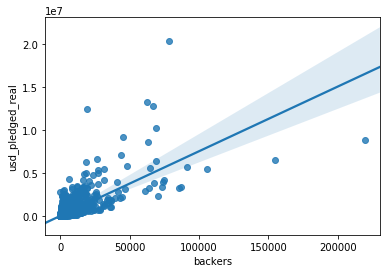

In [38]:
sns.regplot(x='backers',y='usd_pledged_real', data=successful)


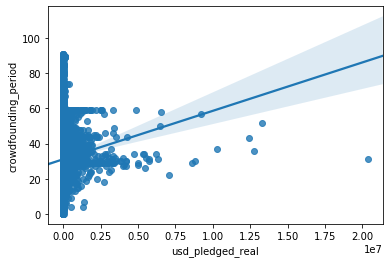

In [39]:
sns.regplot(x='usd_pledged_real',y='crowdfounding_period', data=successful)

In [40]:
ksdf_year = pd.DataFrame()
ksdf_year = {}

for year in range(2009, 2019):
    ksdf_year[year] = df_kickstarter[df_kickstarter['Launch_Year'] == year]['Launch_Year'].count()

In [41]:
ksdf_year = pd.Series(ksdf_year)
ksdf_year = pd.DataFrame(ksdf_year)
ksdf_year = ksdf_year.rename(columns = {0: "counts"})

In [42]:
success_timely = []

for year in range(2009, 2019):
    success = len (df_kickstarter[(df_kickstarter['Launch_Year'] == year) & (df_kickstarter['state'] == 'successful')]['state'])
    overall = len (df_kickstarter[df_kickstarter['Launch_Year'] == year]['Launch_Year'])
    ratio = success/ overall
    success_timely.append(ratio)
    print ("Year = ",year, ratio * 100, '%')

Year =  2009 43.566591422121896 %
Year =  2010 43.66384637322939 %
Year =  2011 46.38868773106681 %
Year =  2012 43.46410785861776 %
Year =  2013 43.28777507747876 %
Year =  2014 31.156542918296555 %
Year =  2015 27.129366106080205 %
Year =  2016 32.81687185226637 %
Year =  2017 35.367816091954026 %
Year =  2018 0.0 %


In [43]:
ksdf_year['success_ratio'] = success_timely

In [44]:
backers_year = {}

for year in range(2009, 2019):
    backers_count = df_kickstarter[df_kickstarter['Launch_Year'] == year]['backers'].sum()
    (backers_count)
    backers_year[year] = backers_count

In [45]:
ksdf_year['backers'] = pd.Series(backers_year)

In [46]:
ksdf_year

,counts,success_ratio,backers
2009,1329,0.435666,43758
2010,10519,0.436638,406875
2011,26237,0.463887,1396473
2012,41165,0.434641,4343786
2013,44851,0.432878,6292568
2014,67745,0.311565,6194576
2015,77300,0.271294,7512058
2016,57184,0.328169,7148604
2017,52200,0.353678,6653360
2018,124,0.000000,1161


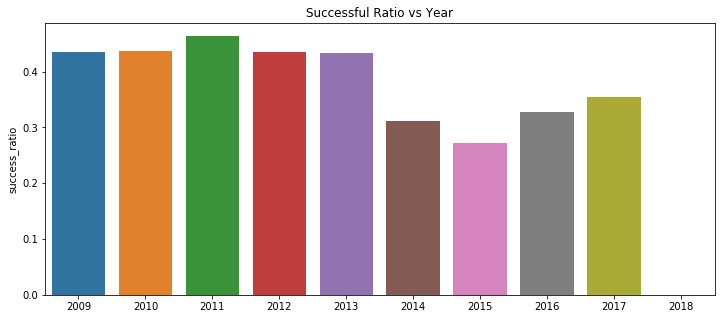

In [47]:
plt.figure(figsize = (12, 5))
plt.title("Successful Ratio vs Year")
sns.barplot(x = ksdf_year.index, y = 'success_ratio', data = ksdf_year)  

In [48]:
pledged_sum = {}
cate_count = {}
back_cate = {}
success = {}

for category in list(set(df_kickstarter['main_category'])):
    amount = df_kickstarter[df_kickstarter['main_category'] == category]['usd_pledged_real'].sum()
    pledged_sum[category] = amount

# Create dataframe
cate_df = pd.Series(pledged_sum)
cate_df = pd.DataFrame(cate_df)
cate_df = cate_df.rename(columns = {0:"pledged_sum"})

for category in list(set(df_kickstarter['main_category'])):
    count = df_kickstarter[df_kickstarter['main_category'] == category]['main_category'].count()
    cate_count[category] = count
    
cate_df['count'] = pd.Series(cate_count)
cate_df['average_amount'] = cate_df['pledged_sum']/ cate_df['count']

for category in list(set(df_kickstarter['main_category'])):
    success_count = len(df_kickstarter[(df_kickstarter['main_category'] == category) & 
         (df_kickstarter['state'] == "successful")])
    success[category] = success_count

cate_df["success_count"] = pd.Series(success)
cate_df["success_rate"] = cate_df['success_count']/ cate_df['count']

for category in set(df_kickstarter['main_category']):
    backers = df_kickstarter[df_kickstarter['main_category'] == category]['backers'].sum()
    back_cate[category] = backers

backers = pd.Series(back_cate)
cate_df['backers'] = backers
cate_df.head()

,pledged_sum,count,average_amount,success_count,success_rate,backers
Fashion,1.303353e+08,22816,5712.450839,5593,0.245135,1401993
Publishing,1.335760e+08,39874,3349.951931,12300,0.308472,2231589
Film & Video,3.915551e+08,63585,6157.978427,23623,0.371518,4197577
Design,7.342202e+08,30070,24417.034698,10550,0.350848,7255880
Comics,7.151839e+07,10819,6610.443828,5842,0.539976,1458090


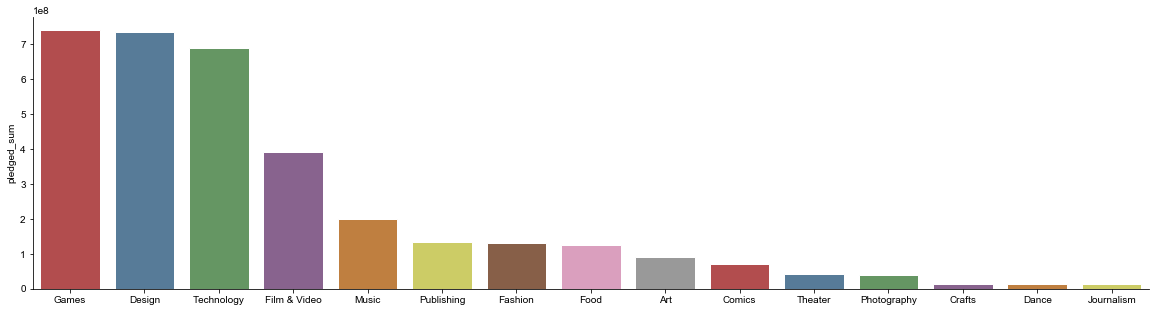

In [49]:
#pledged_sum plot
cate_df = cate_df.sort_values('pledged_sum',  ascending = False)
plt.subplots(figsize = (20,5))
sns.set_style("whitegrid")
sns.barplot(cate_df['pledged_sum'].index, y= cate_df['pledged_sum'] ,
            palette="Set1",saturation = 0.5)
sns.despine(right = True, top = True)

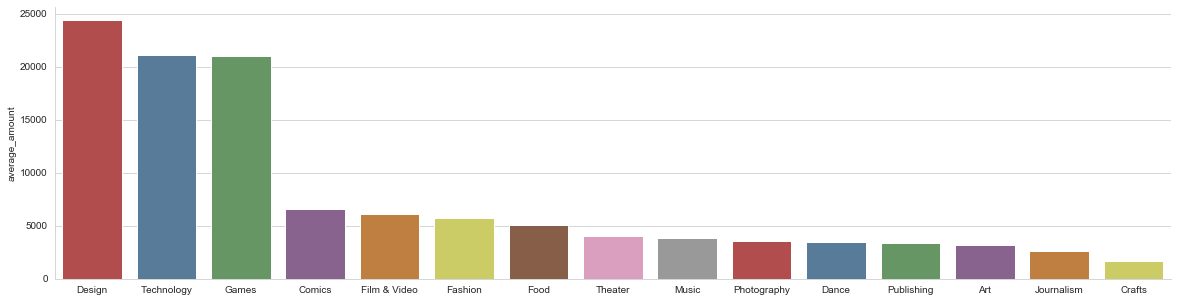

In [50]:
#average amount plot
cate_df = cate_df.sort_values('average_amount',  ascending = False)
plt.subplots(figsize = (20,5))
sns.set_style("whitegrid")
sns.barplot(cate_df['average_amount'].index, y= cate_df['average_amount'] ,
            palette="Set1",saturation = 0.5)
sns.despine(right = True, top = True)

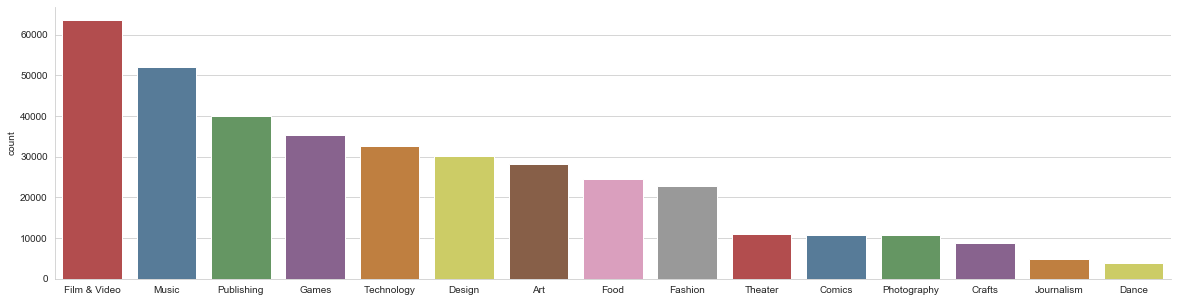

In [51]:
#count plot
cate_df = cate_df.sort_values('count',  ascending = False)
plt.subplots(figsize = (20,5))
sns.set_style("whitegrid")
sns.barplot(cate_df['count'].index, y= cate_df['count'] ,
            palette="Set1",saturation = 0.5)
sns.despine(right = True, top = True)

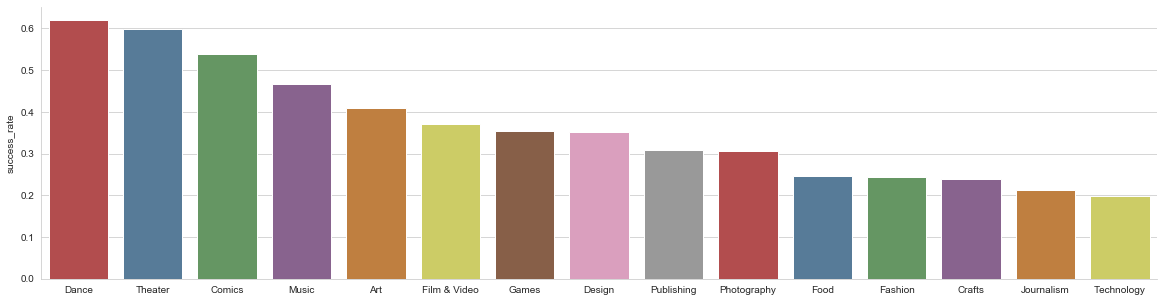

In [52]:
# success rate plot
cate_df = cate_df.sort_values('success_rate',  ascending = False)
plt.subplots(figsize = (20,5))
sns.set_style("whitegrid")
sns.barplot(cate_df['success_rate'].index, y= cate_df['success_rate'] ,
            palette="Set1",saturation = 0.5)
sns.despine(right = True, top = True)

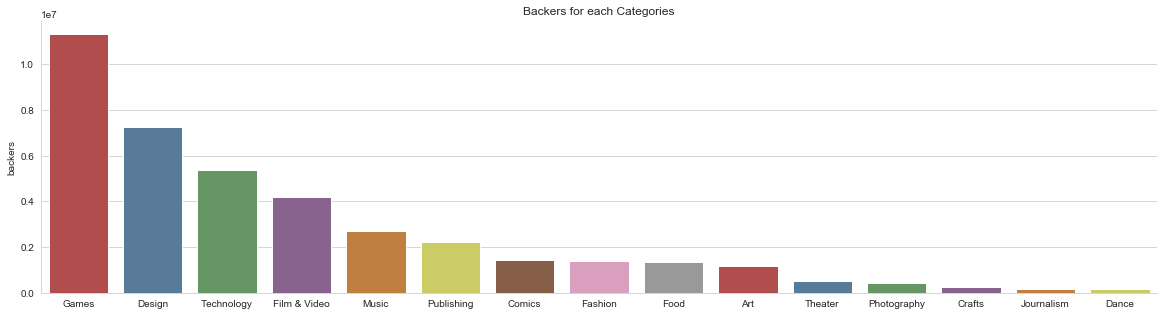

In [53]:
# backers plot
cate_df = cate_df.sort_values('backers',  ascending = False)
plt.subplots(figsize = (20,5))
plt.title('Backers for each Categories')
sns.set_style("whitegrid")
sns.barplot(cate_df['backers'].index, y= cate_df['backers'] ,
            palette="Set1",saturation = 0.5)
sns.despine(right = True, top = True)

# Data Inspection

In [54]:
df_kickstarter.corr()

,ID,goal,pledged,backers,usd_pledged_real,usd_goal_real,Launch_Year,Launch_Month,Launch_Day,Deadline_Year,MDeadline_Month,Deadline_Day,crowdfounding_period
ID,1.000000,0.001679,0.000466,0.000654,-0.000025,0.001854,-0.000574,0.000729,0.002207,-0.000717,0.001157,-0.000197,-0.001131
goal,0.001679,1.000000,0.007358,0.004012,0.005104,0.942692,0.015712,0.001183,-0.002581,0.016343,-0.000005,-0.001201,0.004321
pledged,0.000466,0.007358,1.000000,0.717079,0.952843,0.005024,0.029424,0.002444,0.000092,0.029135,0.005790,0.001620,0.000847
backers,0.000654,0.004012,0.717079,1.000000,0.752539,0.004517,0.016333,-0.002666,-0.001393,0.015381,0.003861,-0.000536,-0.000792
usd_pledged_real,-0.000025,0.005104,0.952843,0.752539,1.000000,0.005596,0.021875,-0.000229,0.000161,0.021364,0.004561,0.000797,0.000946
usd_goal_real,0.001854,0.942692,0.005024,0.004517,0.005596,1.000000,0.012274,0.001423,-0.001753,0.012861,0.000401,-0.001108,0.004184
Launch_Year,-0.000574,0.015712,0.029424,0.016333,0.021875,0.012274,1.000000,-0.073768,-0.003590,0.986906,-0.035627,0.017095,-0.127719
Launch_Month,0.000729,0.001183,0.002444,-0.002666,-0.000229,0.001423,-0.073768,1.000000,-0.032828,-0.015080,0.577879,-0.005548,-0.008984
Launch_Day,0.002207,-0.002581,0.000092,-0.001393,0.000161,-0.001753,-0.003590,-0.032828,1.000000,-0.003400,0.008599,0.438430,-0.007201
Deadline_Year,-0.000717,0.016343,0.029135,0.015381,0.021364,0.012861,0.986906,-0.015080,-0.003400,1.000000,-0.097860,0.008147,-0.035068


In [55]:
df_kickstarter.dtypes

ID                        int64
name                     object
category                 object
main_category            object
currency                 object
goal                    float64
pledged                 float64
state                    object
backers                   int64
country                  object
usd pledged              object
usd_pledged_real        float64
usd_goal_real           float64
Launch_Year               int64
Launch_Month              int64
Launch_Day                int64
Deadline_Year             int64
MDeadline_Month           int64
Deadline_Day              int64
crowdfounding_period      int64
dtype: object

In [56]:
df_kickstarter = df_kickstarter.drop(columns = ['usd pledged'])

In [57]:
categorical_print = list(filter(lambda x: x not in ['ID', 'name', 'goal', 'pledged', 'backers',  'usd_pledged_real', 'usd_goal_real',
                                              'Launch_Year', 'Launch_Month', 'Launch_Day', 'Deadline_Year', 'MDeadline_Month', 
                                              'Deadline_Day', 'crowdfounding_period' ], df_kickstarter.columns))
categorical_print

['category', 'main_category', 'currency', 'state', 'country']

In [58]:
for i in categorical_print:
    print(i, ':', ', '.join(df_kickstarter[i].unique()), '\n')

category : Poetry, Narrative Film, Music, Film & Video, Restaurants, Food, Drinks, Product Design, Documentary, Nonfiction, Indie Rock, Crafts, Games, Tabletop Games, Design, Comic Books, Art Books, Fashion, Childrenswear, Theater, Comics, DIY, Webseries, Animation, Food Trucks, Public Art, Illustration, Photography, Pop, People, Art, Family, Fiction, Accessories, Rock, Hardware, Software, Weaving, Gadgets, Web, Jazz, Ready-to-wear, Festivals, Video Games, Anthologies, Publishing, Shorts, Electronic Music, Radio & Podcasts, Apps, Cookbooks, Apparel, Metal, Comedy, Hip-Hop, Periodicals, Dance, Technology, Painting, World Music, Photobooks, Drama, Architecture, Young Adult, Latin, Mobile Games, Flight, Fine Art, Action, Playing Cards, Makerspaces, Punk, Thrillers, Children's Books, Audio, Performance Art, Ceramics, Vegan, Graphic Novels, Fabrication Tools, Performances, Sculpture, Sound, Stationery, Print, Farmer's Markets, Events, Classical Music, Graphic Design, Spaces, Country & Folk,

In [59]:
df_ks.groupby('state')['ID'].count()

state
canceled       38779
failed        197719
live            2799
successful    133956
suspended       1846
undefined       3562
Name: ID, dtype: int64

In [60]:
df_ks.groupby('country')['ID'].count()

country
AT         597
AU        7839
BE         617
CA       14756
CH         761
DE        4171
DK        1113
ES        2276
FR        2939
GB       33672
HK         618
IE         811
IT        2878
JP          40
LU          62
MX        1752
N,0"      3797
NL        2868
NO         708
NZ        1447
SE        1757
SG         555
US      292627
Name: ID, dtype: int64

Text(0.5, 1.0, 'Number of Countries in Data')

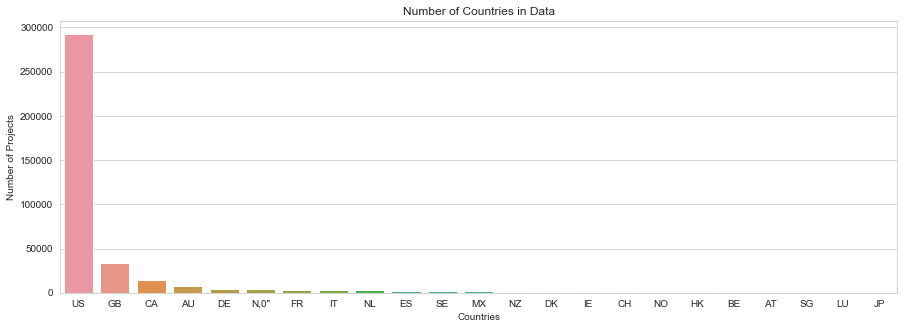

In [61]:
categories_country = df_kickstarter.country.value_counts()
plt.figure(figsize = (15, 5))
sns.barplot(x = categories_country.index, y = categories_country.values)
plt.ylabel('Number of Projects')
plt.xlabel('Countries')
plt.title('Number of Countries in Data')

Text(0.5, 1.0, 'Top 8 Number of Countries in Data')

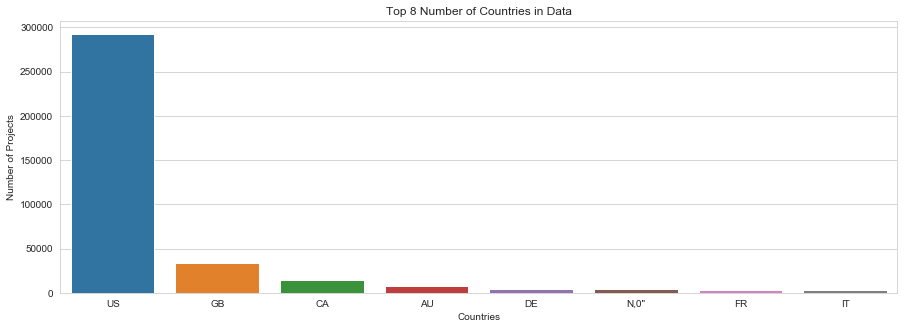

In [62]:
plt.figure(figsize = (15, 5))
sns.barplot(x = categories_country[:8].index, y = categories_country[:8].values)
plt.ylabel('Number of Projects')
plt.xlabel('Countries')
plt.title('Top 8 Number of Countries in Data')

As we can see from the plot of the number of countries above, most of the projects are from the US and only a small percentage of them are from the other countries. And because of this, as it is logical to think the major currency used in the projects is the dollar, in fact this is what rappresents the following plot.

In [63]:
df_ks.groupby('currency')['ID'].count()

currency
AUD      7950
CAD     14962
CHF       768
DKK      1129
EUR     17405
GBP     34132
HKD       618
JPY        40
MXN      1752
NOK       722
NZD      1475
SEK      1788
SGD       555
USD    295365
Name: ID, dtype: int64

Text(0.5, 1.0, 'Currency in Data')

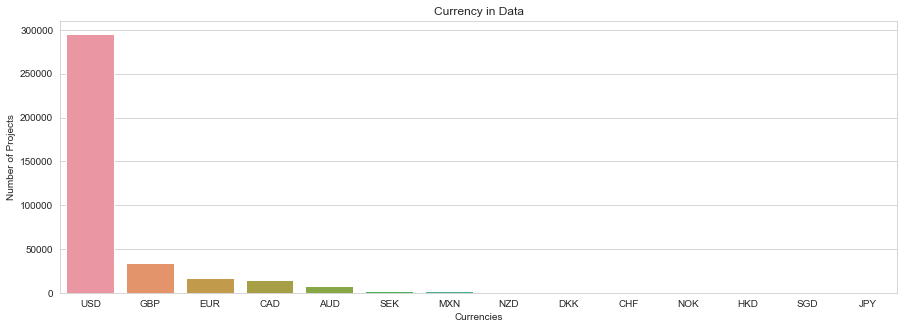

In [64]:
categories_currency = df_kickstarter.currency.value_counts()
plt.figure(figsize = (15, 5))
sns.barplot(x = categories_currency.index, y = categories_currency.values)
plt.ylabel('Number of Projects')
plt.xlabel('Currencies')
plt.title('Currency in Data')

In [65]:
df_kickstarter.groupby('category')['ID'].count()

category
3D Printing            683
Academic               916
Accessories           3165
Action                 740
Animals                255
Animation             2541
Anthologies            784
Apparel               7166
Apps                  6345
Architecture           760
Art                   8253
Art Books             2676
Audio                  410
Bacon                  221
Blues                  268
Calendars              329
Camera Equipment       416
Candles                429
Ceramics               305
Children's Books      6756
Childrenswear          483
Chiptune                35
Civic Design           289
Classical Music       2613
Comedy                2320
Comic Books           2743
Comics                4996
Community Gardens      298
Conceptual Art        1030
Cookbooks              540
                     ...  
Shorts               12357
Small Batch           1808
Software              3048
Sound                  669
Space Exploration      323
Spaces             

Text(0.5, 1.0, 'Categories')

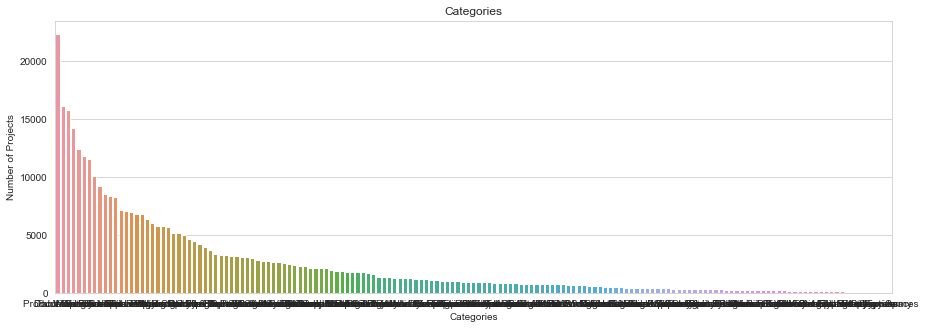

In [66]:
categories_categories = df_kickstarter.category.value_counts()
plt.figure(figsize = (15, 5))
sns.barplot(x = categories_categories[:159].index, y = categories_categories[:159].values)
plt.ylabel('Number of Projects')
plt.xlabel('Categories')
plt.title('Categories')

Text(0.5, 1.0, 'Top 15 Categories')

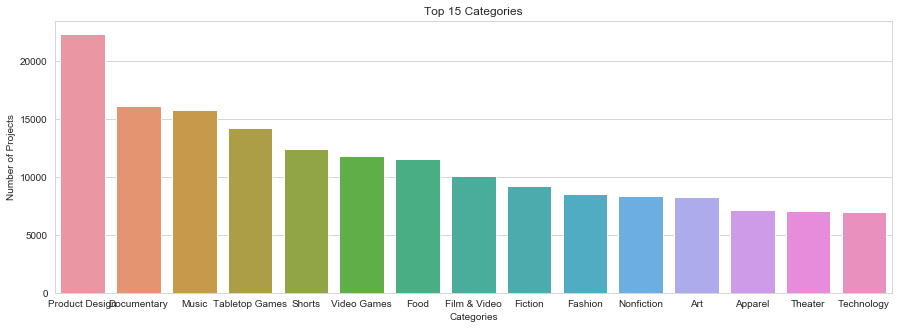

In [67]:
plt.figure(figsize = (15, 5))
sns.barplot(x = categories_categories[:15].index, y = categories_categories[:15].values)
plt.ylabel('Number of Projects')
plt.xlabel('Categories')
plt.title('Top 15 Categories')

Above we have plotted how the number of project are divided in this dataframe sorted by categories. We can see that the most amount of project are releted to the Product desing category.

In [68]:
df_kickstarter.groupby('main_category')['ID'].count()

main_category
Art             28153
Comics          10819
Crafts           8809
Dance            3768
Design          30070
Fashion         22816
Film & Video    63585
Food            24602
Games           35231
Journalism       4755
Music           51918
Photography     10779
Publishing      39874
Technology      32569
Theater         10913
Name: ID, dtype: int64

Text(0.5, 1.0, 'Main Categories')

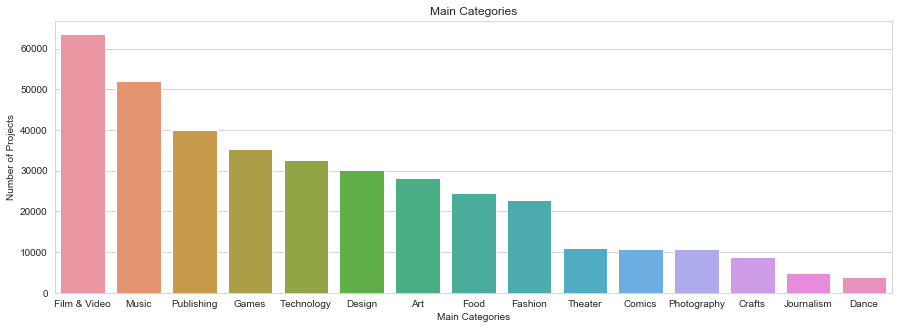

In [69]:
categories_maincategories = df_kickstarter.main_category.value_counts()
plt.subplots(figsize = (15, 5))
sns.barplot(x = categories_maincategories.index, y = categories_maincategories.values)
plt.ylabel('Number of Projects')
plt.xlabel('Main Categories')
plt.title('Main Categories')

# State Plotting in the Data

In the following paragraph we wanted to outline how the various projects are divided by each state.

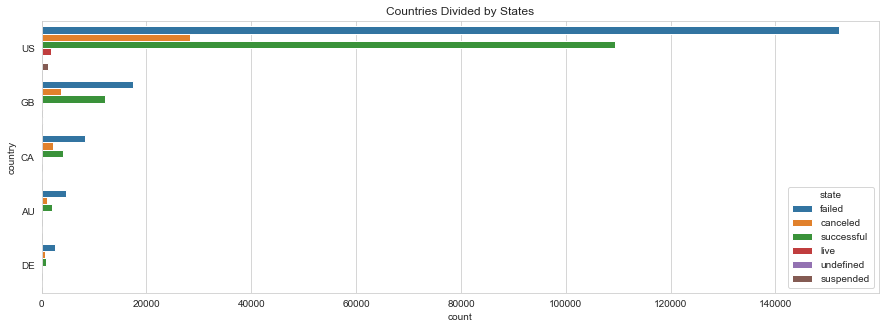

In [70]:
plt.figure(figsize = (15, 5))
plt.title("Countries Divided by States")
sns.countplot(y = 'country', hue = 'state', data = df_kickstarter , order = ['US', 'GB', 'CA', 'AU', 'DE'])

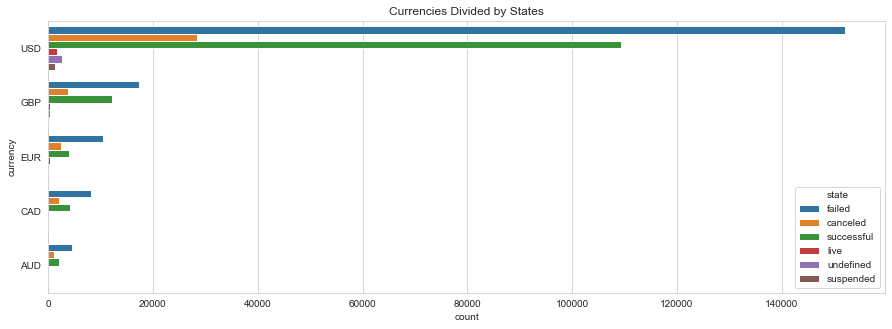

In [71]:
plt.figure(figsize = (15, 5))
plt.title("Currencies Divided by States")
sns.countplot(y = 'currency' , hue = 'state', data = df_kickstarter , order = ['USD', 'GBP', 'EUR', 'CAD', 'AUD'])

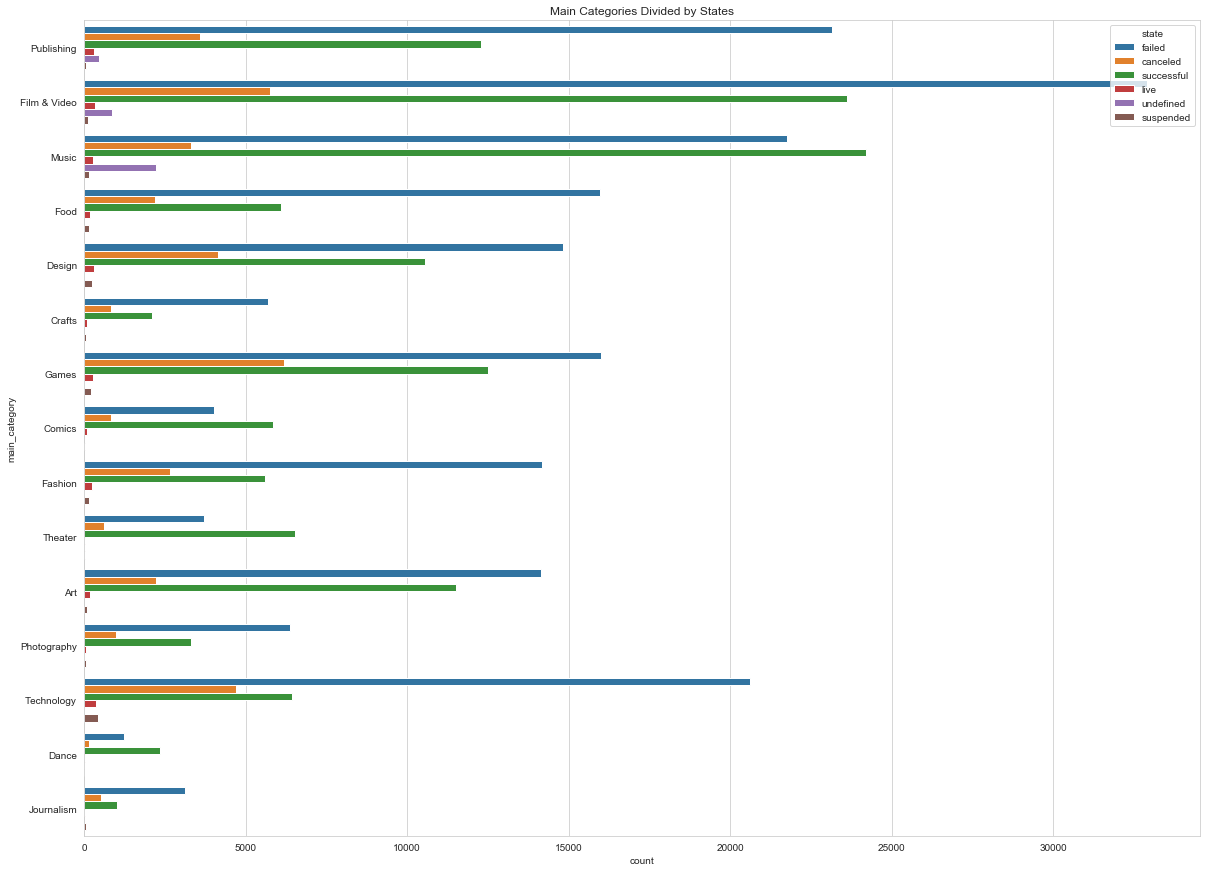

In [72]:
plt.figure(figsize = (20, 15))
plt.title("Main Categories Divided by States")
sns.countplot(y = 'main_category', hue = 'state', data = df_kickstarter)

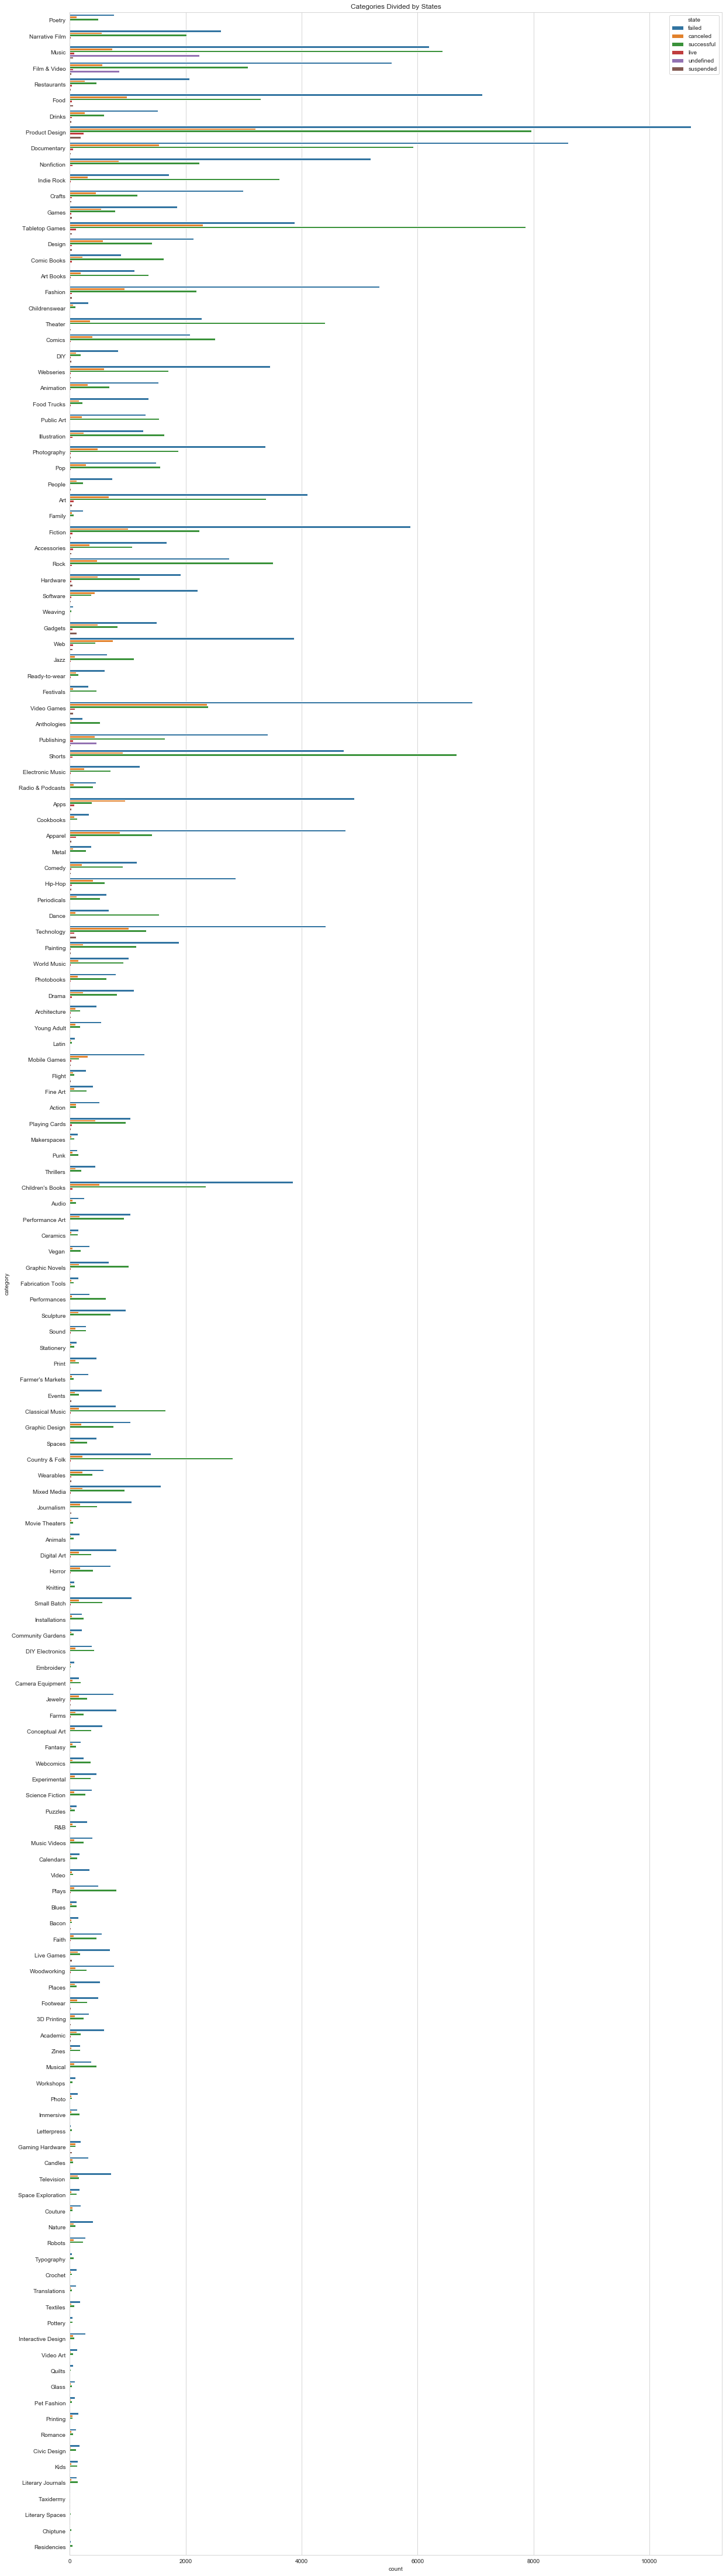

In [73]:
plt.figure(figsize = (20, 80))
plt.title("Categories Divided by States")
sns.countplot(y = 'category', hue = 'state', data = df_kickstarter)

# Derivate Plotting from Data

In [74]:
df_years = pd.DataFrame()
df_years["launch_year"] = df_kickstarter['Launch_Year']
df_years.head()

,launch_year
0,2015
1,2017
2,2013
3,2012
4,2015


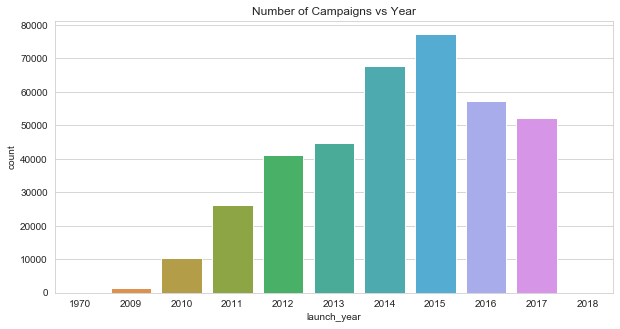

In [75]:
plt.figure(figsize = (10, 5))
plt.title("Number of Campaigns vs Year")
sns.countplot(df_years.launch_year)

In [76]:
backers = []

launchyear = df_kickstarter.Launch_Year.value_counts().index

for i in launchyear:
    new = df_kickstarter[df_kickstarter.Launch_Year == i]
    
    backers.append((i, new.backers.sum()))

backers = pd.DataFrame(backers, columns = ["Years","Backers"])
backers

,Years,Backers
0,2015,7512058
1,2014,6194576
2,2016,7148604
3,2017,6653360
4,2013,6292568
5,2012,4343786
6,2011,1396473
7,2010,406875
8,2009,43758
9,2018,1161


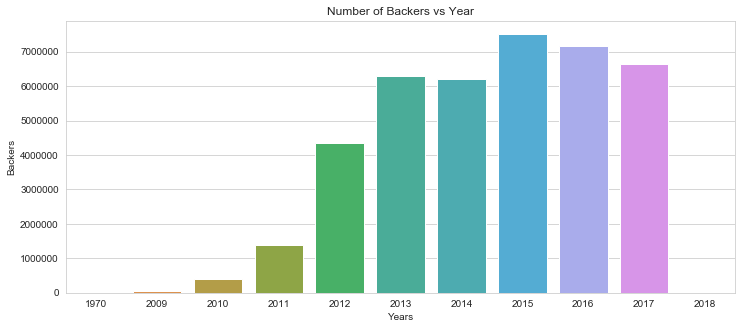

In [77]:
plt.figure(figsize = (12, 5))
plt.title("Number of Backers vs Year")
sns.barplot(x = "Years", y = "Backers", data = backers)

Above we have represented two graphs that indicate the distribution of the number of projects per year, with the difference that in one in the y axis there are the number of Campaigns while in the other there are the number of Backers

# Comparison between Data and its Plot

In [78]:
datasuccess = df_kickstarter[df_kickstarter.state == "successful"]
datafail = df_kickstarter[df_kickstarter.state == "failed"]

suc_categories = datasuccess.groupby("main_category")["usd_pledged_real"].sum()
suc_categories = suc_categories/1000000

failed_categories = datafail.groupby("main_category")["usd_pledged_real"].sum()
failed_categories = failed_categories/1000000

In [79]:
failed_categories_goals = datafail.groupby("main_category")["usd_goal_real"].sum()
failed_categories_goals = failed_categories_goals/1000000

success_categories_goals = datasuccess.groupby("main_category")["usd_goal_real"].sum()
success_categories_goals = success_categories_goals/1000000

Text(0.5, 1.0, 'Money reduced (in USD Million) by Main Category')

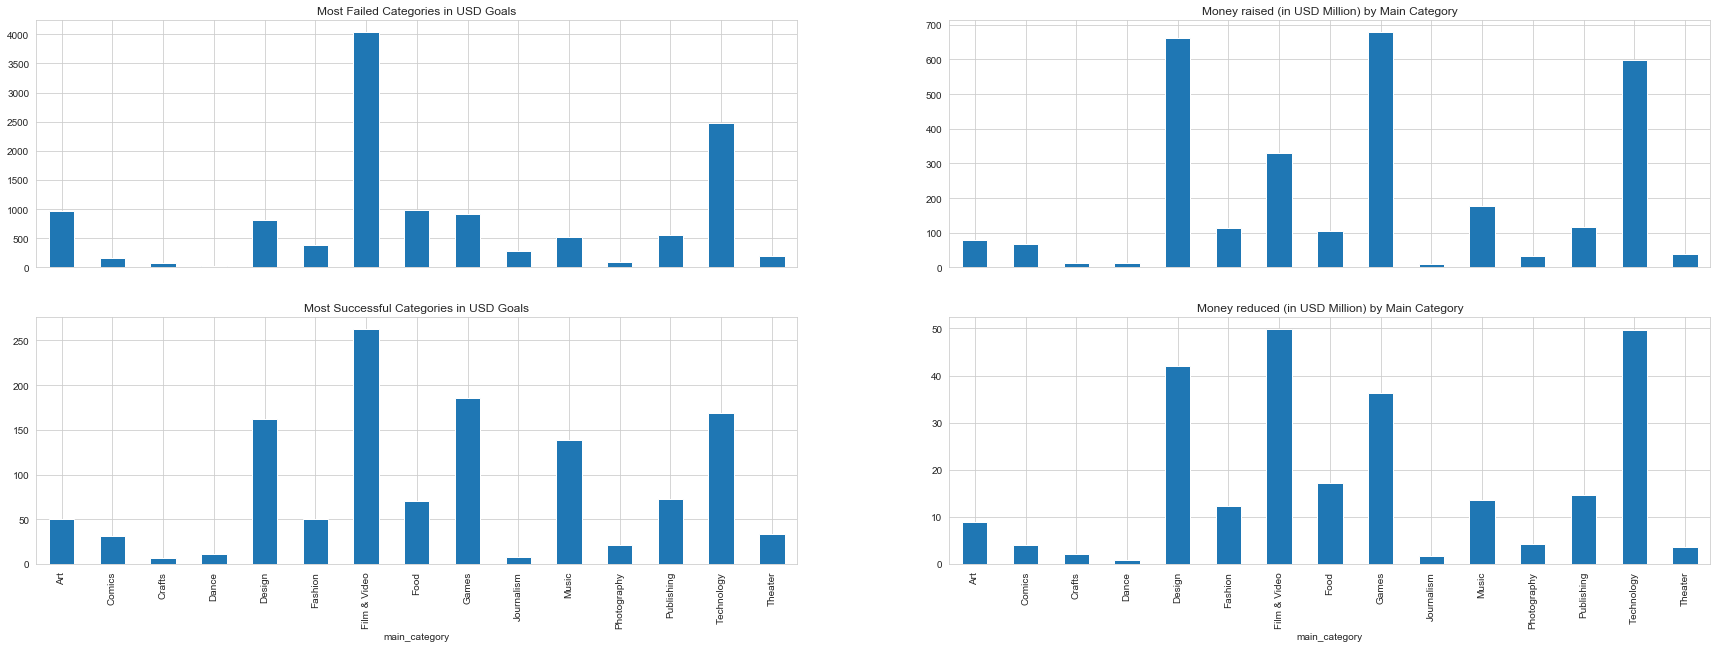

In [80]:
f, axarr = plt.subplots(2,2, figsize=(30, 10), sharex=True)
ax1 = failed_categories_goals.plot.bar(ax=axarr[0][0])
ax1.set_title("Most Failed Categories in USD Goals")

ax2 = success_categories_goals.plot.bar(ax=axarr[1][0])
ax2.set_title("Most Successful Categories in USD Goals")
 
ax3 = suc_categories.plot.bar(ax=axarr[0][1])
ax3.set_title("Money raised (in USD Million) by Main Category")

ax4 = failed_categories.plot.bar(ax=axarr[1][1])
ax4.set_title("Money reduced (in USD Million) by Main Category")

Text(0.5, 1.0, 'Failed Main Campaigns Categories')

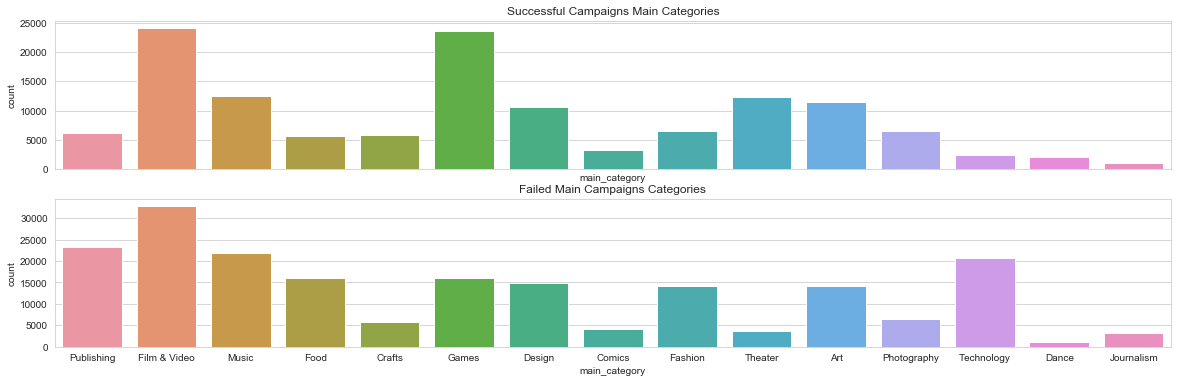

In [81]:
f, axarr = plt.subplots(2,1, figsize=(20, 6), sharex=True)
ax=sns.countplot(datasuccess.main_category,ax=axarr[0])
ax.set_title("Successful Campaigns Main Categories")
ax1=sns.countplot(datafail.main_category,ax=axarr[1])
ax1.set_title("Failed Main Campaigns Categories")

Concluding our graphic analysis through these summary diagrams we wanted to underline mainly the number of failed and successful campaigns for each category, in particular some categories such as  Games and Theater has a higher percentage of successful projects,  unlike others such as for example technology and fashion, which have numerous failed projects.